In [5]:
from ND2Loader import read_dir, read_nd2
import matplotlib.pyplot as plt
import numpy as np
from torch_seg.preprocessing import label_mask_stack, make_stack_binary
from segutils import visutils, imutils
%matplotlib inline

In [2]:
# nd2 = read_nd2('resources/images/misc/Clusters-binary/Omer/oxi/Hfq mCherry oxi.nd2')
nd2 = read_nd2('resources/1.nd2')

/Users/guyazran/Desktop/School/Bachelor/Computer Science/Year 4/Semester A/Research Project/venv-bio/lib/python3.6/site-packages/nd2reader/raw_metadata.py:171: UserWarning: Z-levels details missing in metadata. Using Z-coordinates instead.
  warnings.warn("Z-levels details missing in metadata. Using Z-coordinates instead.")


In [3]:
nd2.channels

['Ph3', 'YFP', 'Threshold (Ph3)', 'Threshold (YFP)']

In [4]:
# fluo = (nd2.images['mCherry'] / 256).astype(np.uint8)
fluo = nd2.images['YFP'][0]
fluo_msk = label_mask_stack(nd2.images['Threshold (YFP)'])[0]
fluo.shape, fluo.dtype

((1022, 1024), dtype('uint16'))

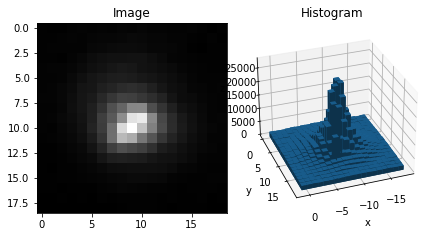

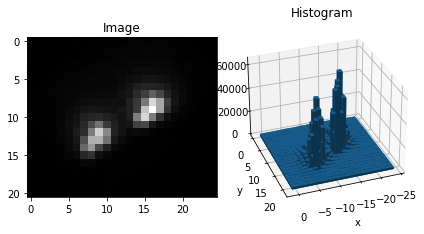

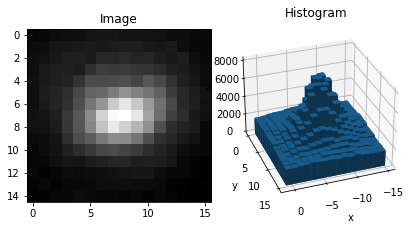

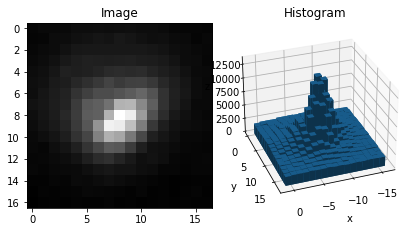

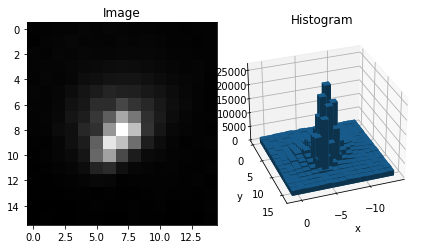

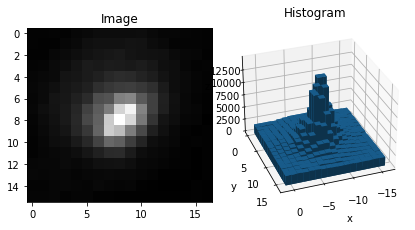

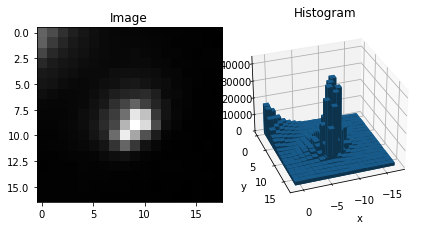

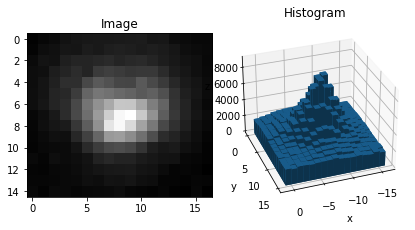

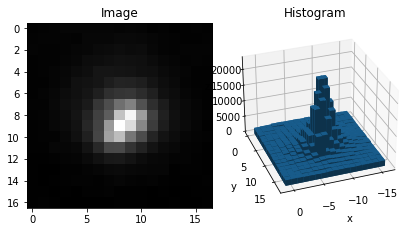

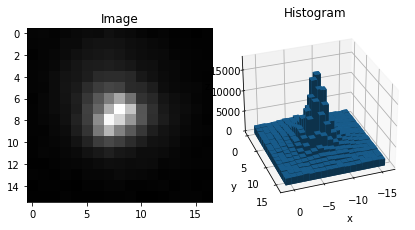

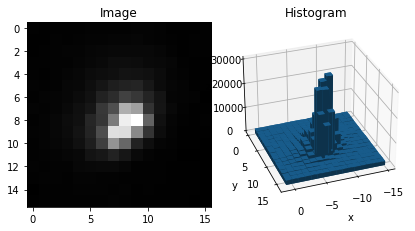

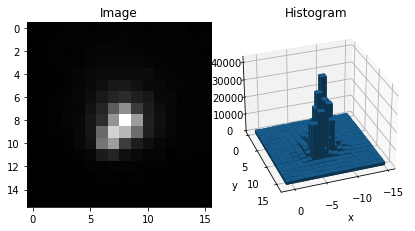

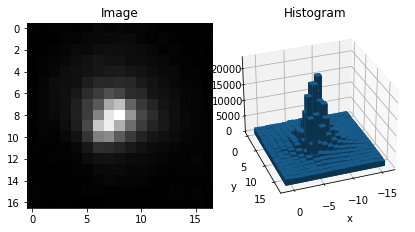

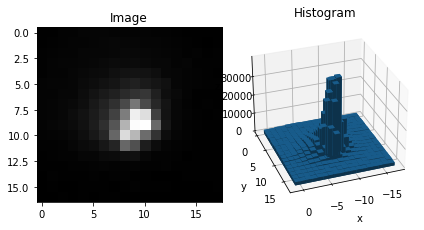

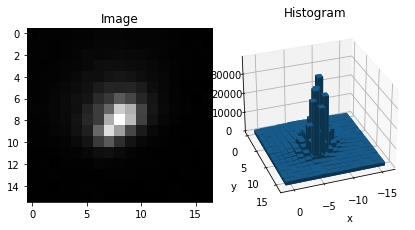

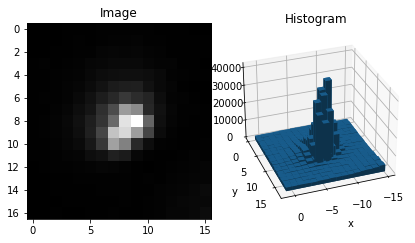

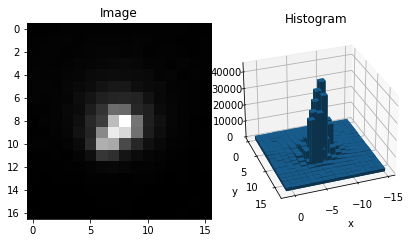

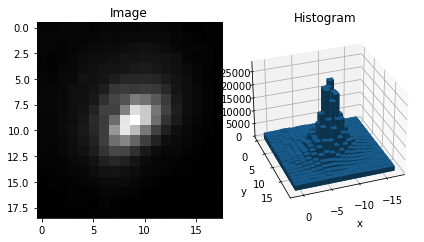

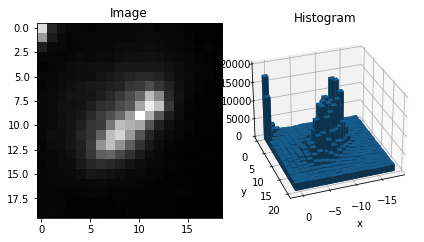

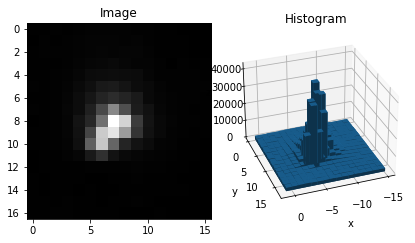

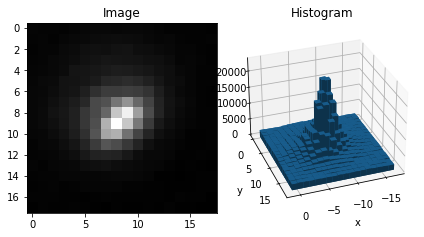

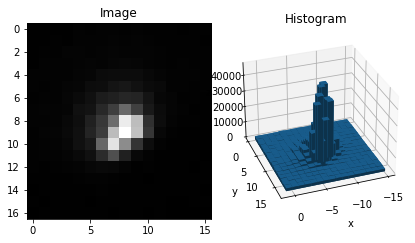

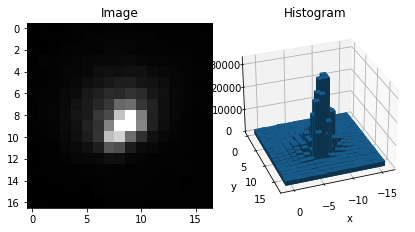

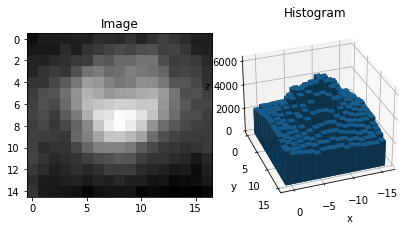

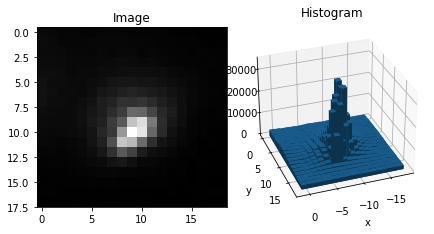

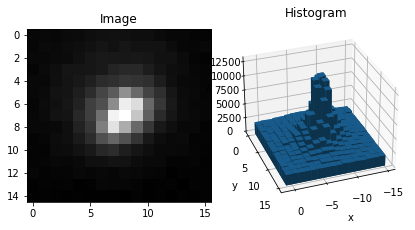

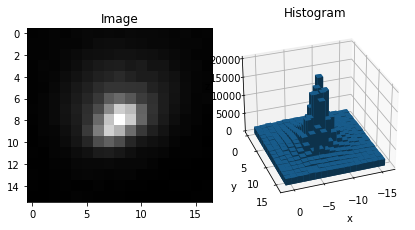

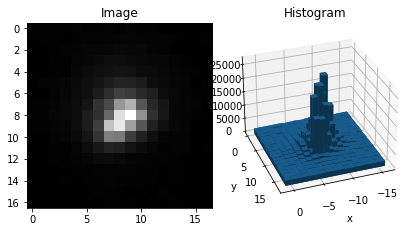

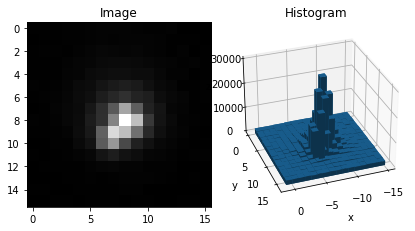

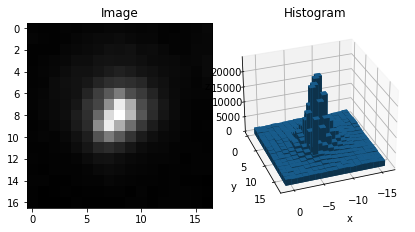

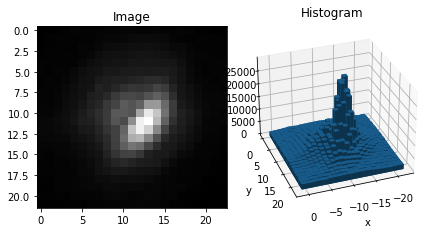

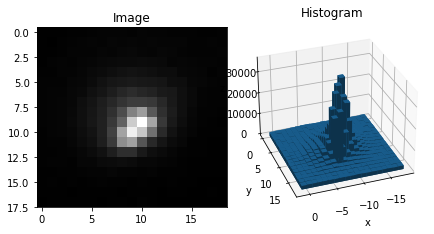

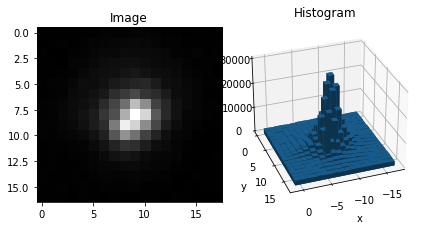

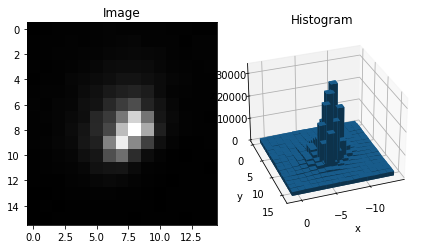

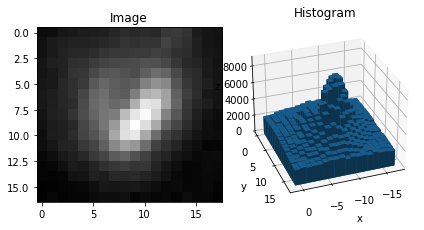

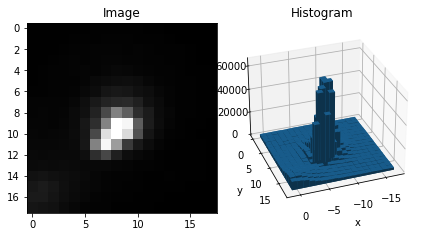

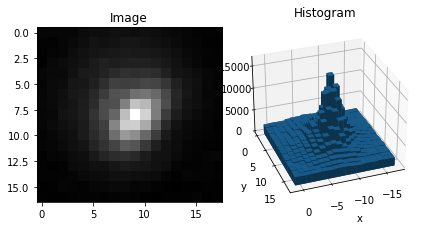

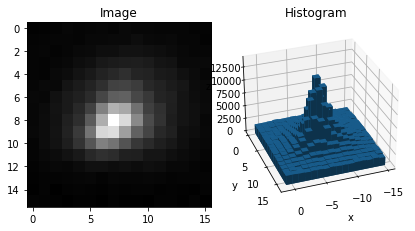

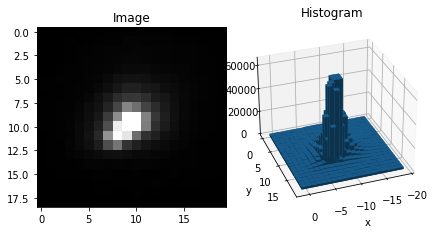

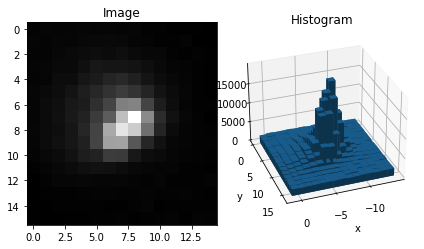

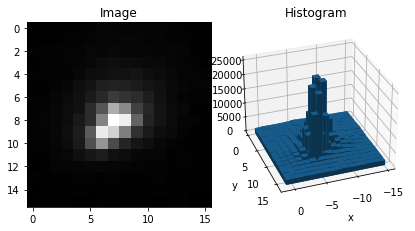

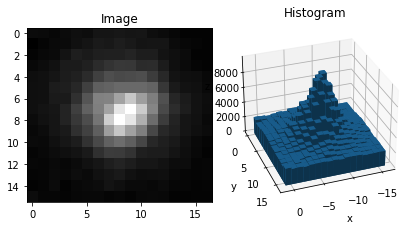

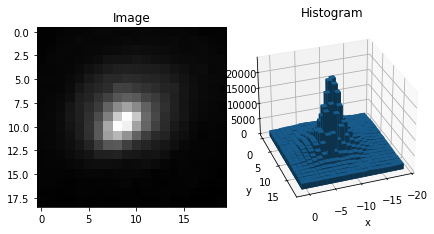

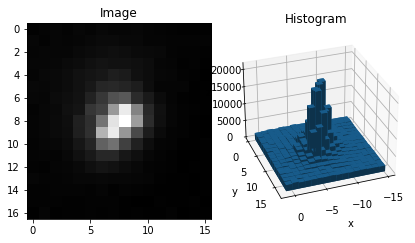

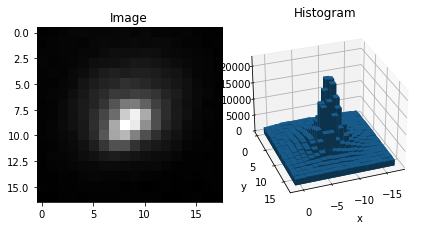

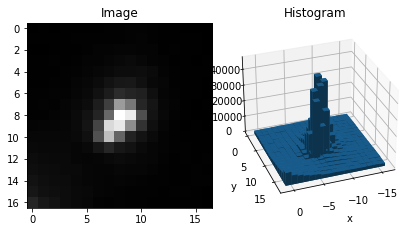

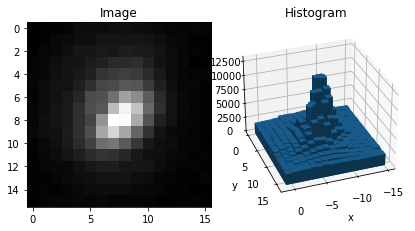

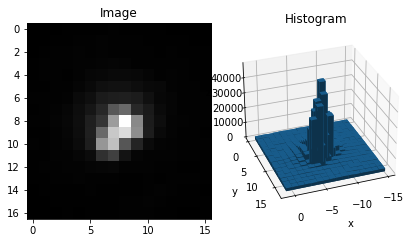

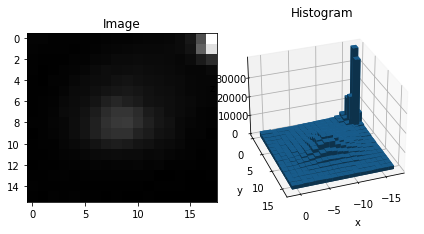

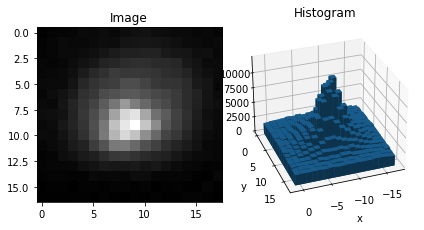

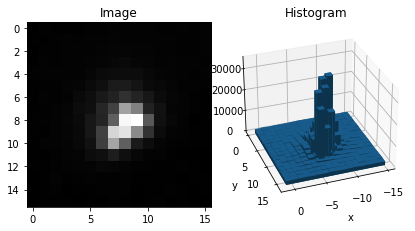

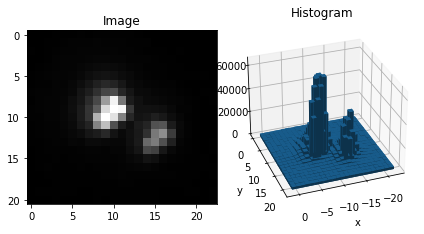

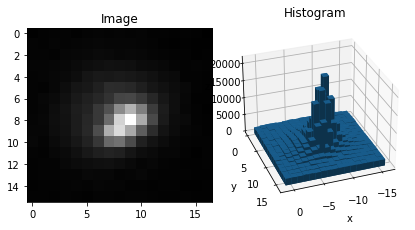

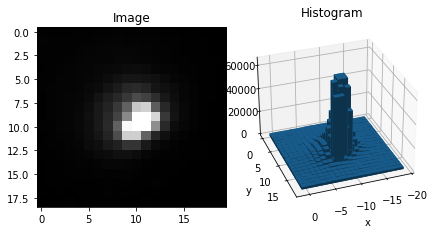

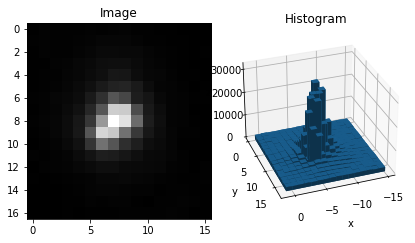

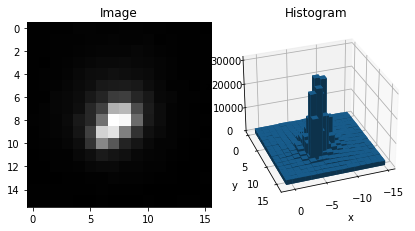

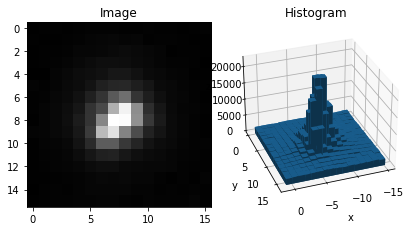

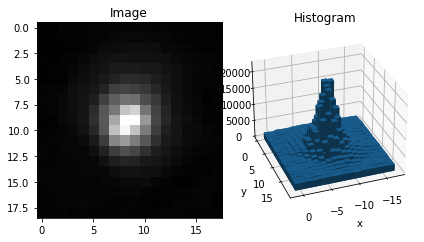

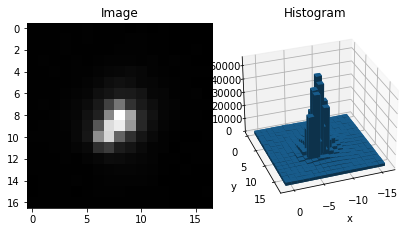

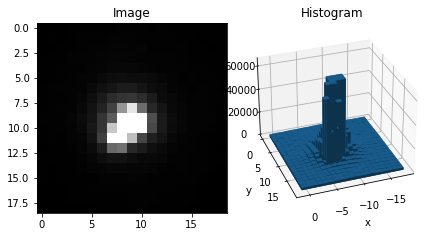

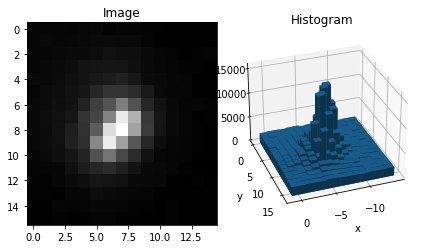

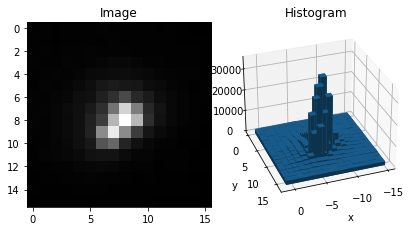

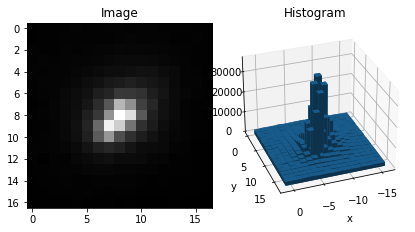

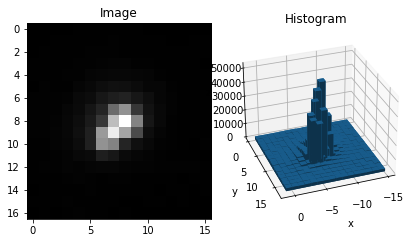

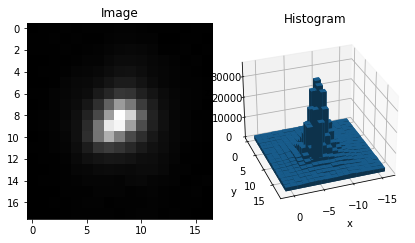

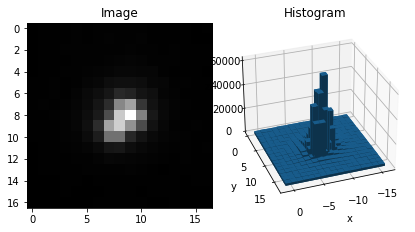

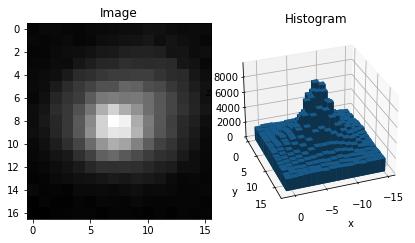

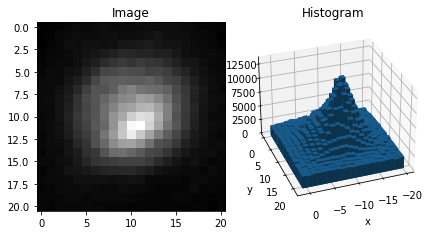

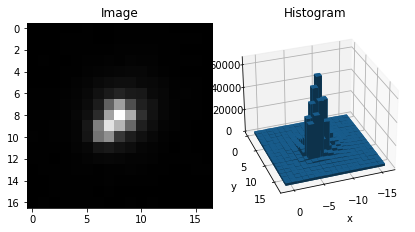

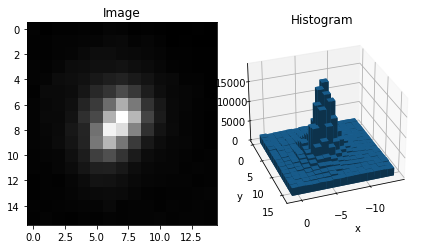

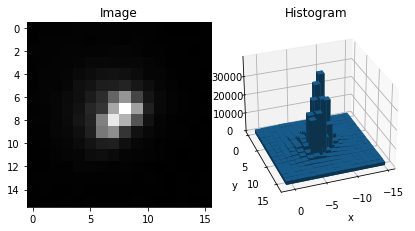

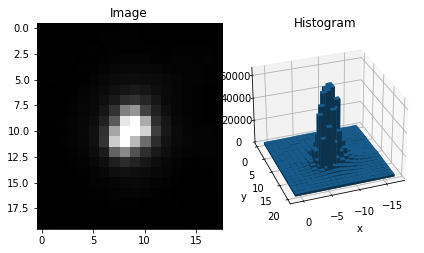

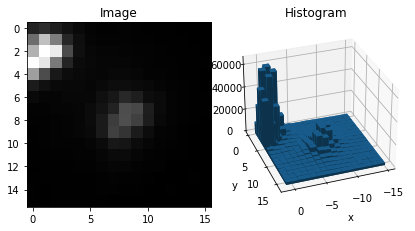

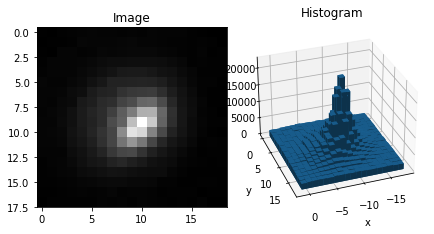

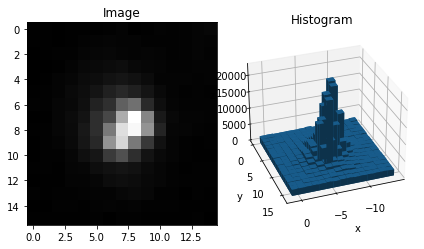

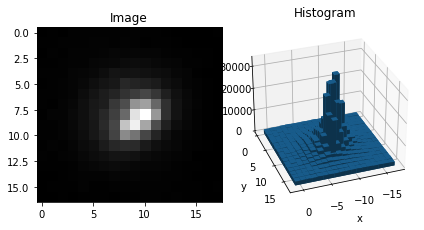

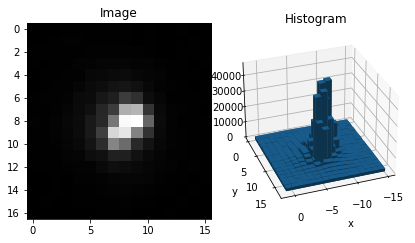

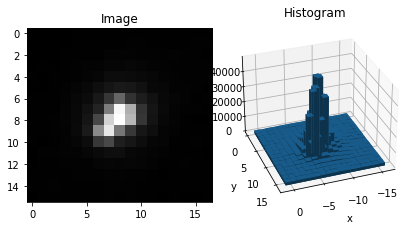

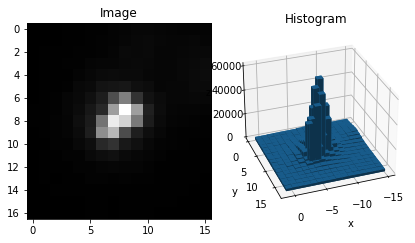

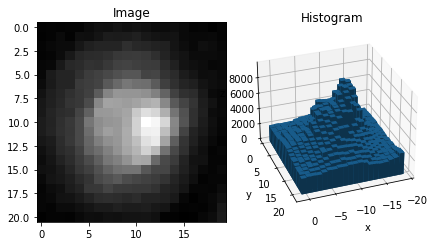

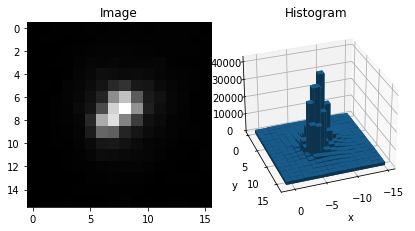

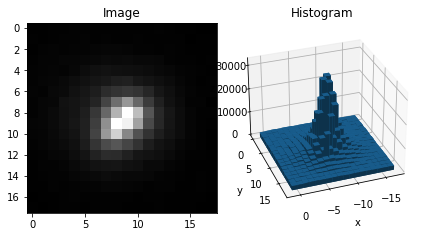

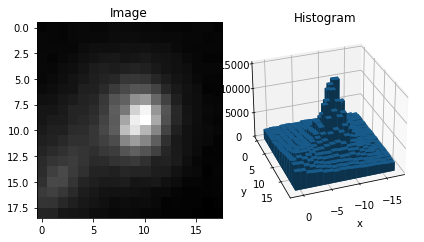

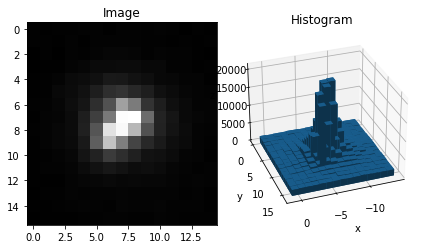

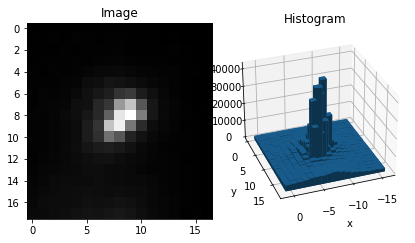

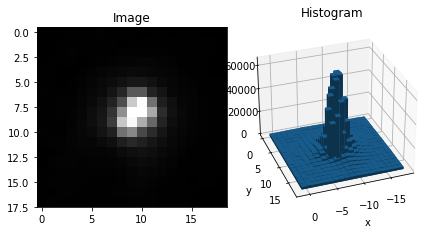

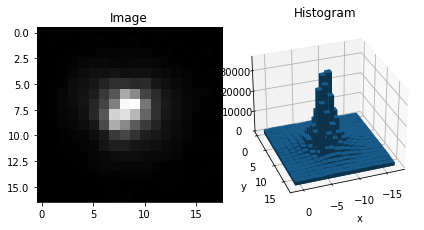

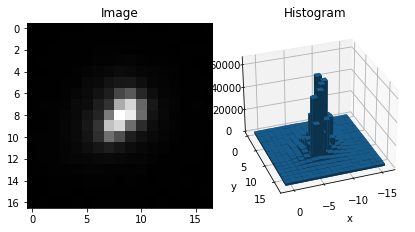

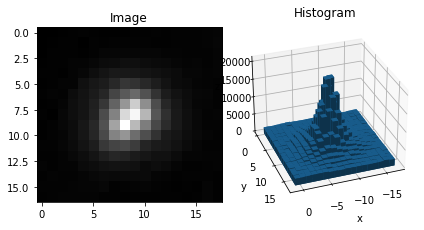

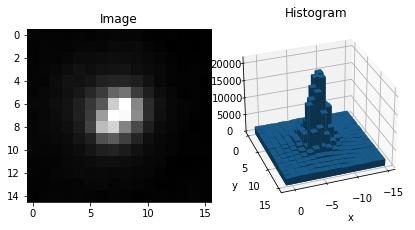

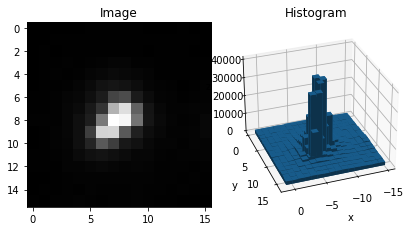

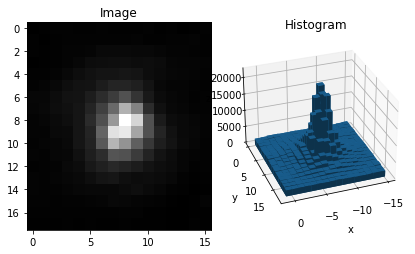

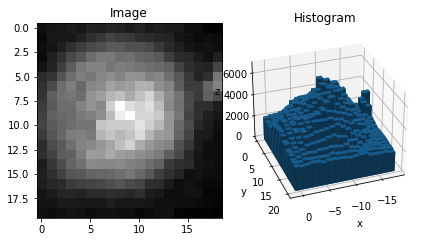

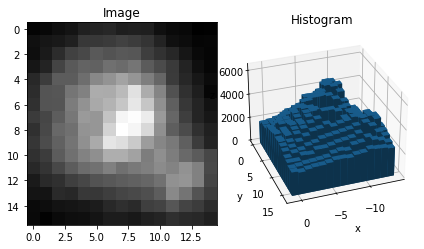

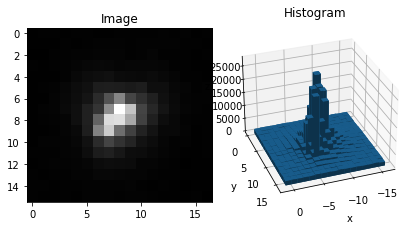

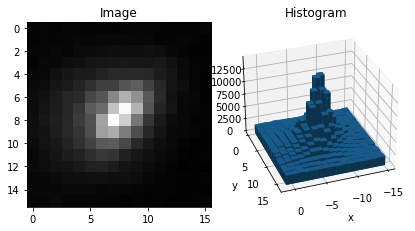

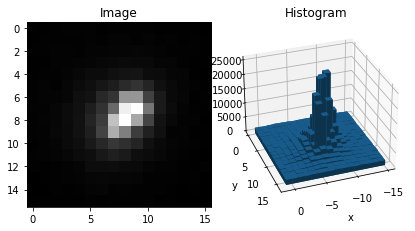

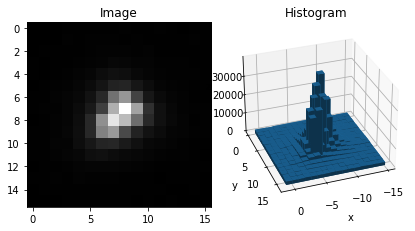

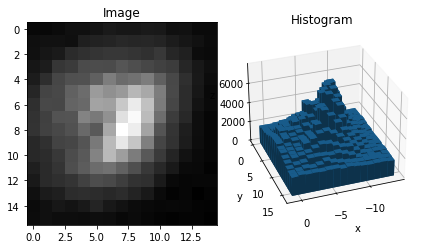

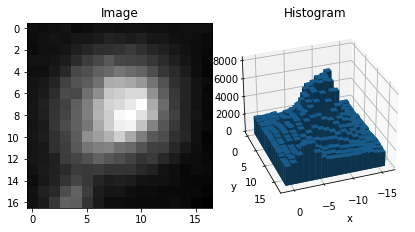

In [8]:
for cluster_id in imutils.get_mask_labels(fluo_msk):
    cropped_cluster = imutils.crop_out_object(fluo_msk, cluster_id, image_to_crop=fluo, padding=5)
    visutils.plot_image_as_3d_histogram(cropped_cluster)